In [ ]:
!pip3 install scikit-learn # install scikit-learn

In [ ]:
! pip3 show scikit-learn

In [390]:
# Import requirements
import sys
assert sys.version_info >= (3,5)
sys.path.append('..../ml/ml_env/lib/python3.8/site-packages')

import sklearn
# assert sklearn.__version__ > "0.20" # Scikit-learn version 0.20 or later is required

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [391]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "titanic_visualization"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [392]:
# Download data into pandas dataframe
import os
import pandas as pd

DATA_DIR = "..../ml/Titanic_project/titanic_dataset/"
def fetch_data(path=DATA_DIR):
    """Fetches data from a specified filepath and filename"""
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        

fetch_data() 

In [393]:
def load_data(filename, filepath=DATA_DIR):
    csv_path = os.path.join(filepath, filename)
    return pd.read_csv(csv_path)

In [394]:
train_data = load_data("train.csv")
test_data = load_data("test.csv")

In [395]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [396]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [397]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [398]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


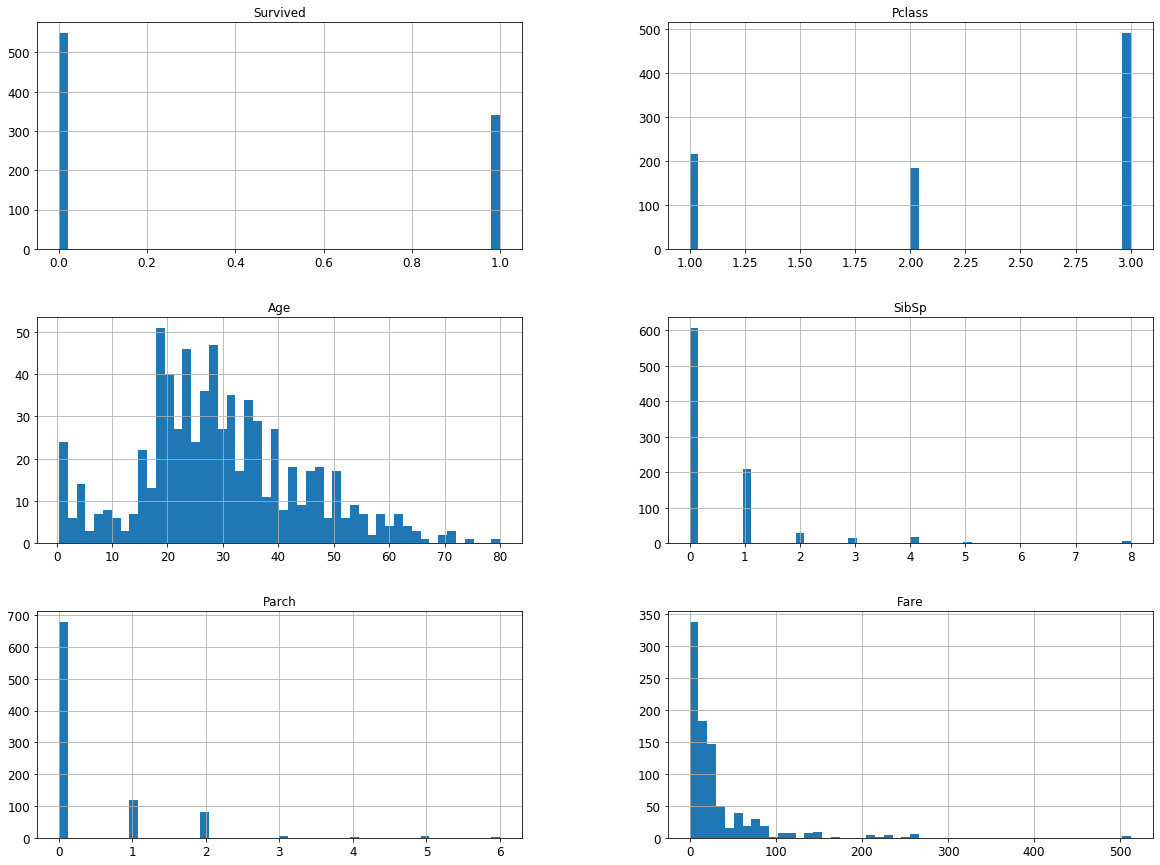

In [399]:
%matplotlib inline
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [400]:
missing_values = train_data.isnull()
missing_values.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,True,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


In [401]:
# Creates a list of all columns and prints the name of each column and a boolean indicating the number of empty rows in each attribute
for column in missing_values.columns.values.tolist():
    print(f"{column}\n{missing_values[column].value_counts()}\n")

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



Attributes such as **Age, Cabin, and Embarked** have missing values. I handled the missing values in the age column by calculating the median age for female and male travellers and filled the missing values in the age column depending on if the passenger is male or female.

In [402]:
female_med_age = train_data[train_data["Sex"] == "female"]["Age"].median()
male_med_age = train_data[train_data["Sex"] == "male"]["Age"].median()

In [403]:
male_med_age

29.0

In [404]:
female_med_age

27.0

In [405]:
# Fill-in null values in the Age column for both sexes.
# df.loc[(df.col1.isna()) & (df.col2 == '0-1000'), 'col1'] = 'small'.
train_data.loc[(train_data['Age'].isna()) & (train_data['Sex'] == 'male'), 'Age'] = male_med_age
train_data.loc[(train_data['Age'].isna()) & (train_data['Sex'] == 'female'), 'Age'] = female_med_age

In [406]:
train_data[["Age", "Sex"]].head(10)

,Age,Sex
PassengerId,,
1,22.0,male
2,38.0,female
3,26.0,female
4,35.0,female
5,35.0,male
6,29.0,male
7,54.0,male
8,2.0,male
9,27.0,female


In [407]:
# Fill in the missing values in the 
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

In [408]:
train_data["Embarked"].isna().sum()

0

In [409]:
# Check target values in the survived column is indeed 0 or 1
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [410]:
# Check the categorical attributes like Pclass, Sex, and Embarked
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [411]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [412]:
train_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=SouthHampton

### Preporecessing Pipelines

In [413]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [414]:
# Pipeline for numerical values
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [415]:
# Pipeline for categorical attributes

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [416]:
# Combine the numerical and categorical pipelines

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [417]:
data_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs]
)
data_train

array([[-0.571902  ,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65778516,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.26448021, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.18762476,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.26448021, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.19665248, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [418]:
tar_pred = train_data["Survived"]

### Training Classifier and Model Performance

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


rforest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rforest_clf.fit(data_train, tar_pred)

RandomForestClassifier(random_state=42)

In [420]:
# To evaluate the performance of the train model classifier
forest_scores = cross_val_score(rforest_clf, data_train, tar_pred, cv=10)
forest_scores.mean()

0.8115355805243446

In [421]:
# Training the data on SVM classifier
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(data_train, tar_pred)

SVC(gamma='auto')

In [422]:
svm_scores = cross_val_score(svm_clf, data_train, tar_pred, cv=10)
svm_scores.mean()

0.8249313358302123

In [423]:
# To make predictions on the test data

data_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
rforest_pred = rforest_clf.predict(data_test)

In [424]:
svc_pred = svm_clf.predict(data_test)


In [425]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_params = {"C": [1, 10, 100], "penalty": ["l2"], "solver": ["newton-cg", "lbfgs"]}

log_reg = LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(log_reg, grid_params,scoring="accuracy", cv=10)
logreg_cv.fit(data_train,tar_pred)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [426]:
logreg_cv.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [427]:
logreg_cv.best_score_

0.8002372034956304

Rather of just looking at the mean accuracy across the 10 cross-validation folds, ploting all 10 scores for the SVC and Random forest model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores (thanks to Nevin Yilmaz for suggesting this visualization). Note that the `boxplot()` function detects outliers (called "fliers") and does not include them within the whiskers. Specifically, if the lower quartile is 
_Q1_ and the upper quartile is _Q3_, then the interquartile range **_IOR = Q3 - Q1_** (this is the box's height), and any score lower than **_Q1 - 1.5 x IQR_** is a flier, and so is any score greater than **_Q3 + 1.5 x IQR_**.

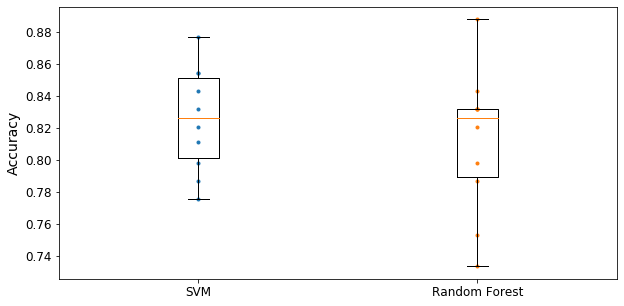

In [428]:
plt.figure(figsize=(10, 5))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [429]:
test_data.reset_index(inplace=True)

In [430]:
# Saving predictions to CSV

results = pd.DataFrame({
    "PassengerId": test_data["PassengerId"], "Survived": svc_pred
})
results.to_csv("submissions.csv", index=False)